# k-Nearest Neighbor Method

+ Class labels are decided by the average among neighbors.
+ The number of neighbors, k, changes the result of classification; the smaller, finer and the bigger, smoother.

# Task

+ n samples
+ 2 features
+ 2 categories
+ Classification

# Definition 定義

$$
\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x) } y_i  ,
$$

where $N_k(x)$ is the neighborhood of x defined by the k closest points $x_i$. 

# k=1

When k=1, the space is classified as a Voronoi diagram.

[Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram)

[ボロノイ図](https://en.wikipedia.org/wiki/Voronoi_diagram)

## Reference 参考

The Voronoi diagram of a set of points is dual to its [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation).

点の集合のボロノイ図は[ドロネー三角化](https://en.wikipedia.org/wiki/Delaunay_triangulation)の双対に相当する。

# k > 1

When k > 1, $\hat{Y}(x)$ is an average of $Y(x)$ values of points nearby, that means the effect of each point nearby is "averaged" or "smoothed".

Therefore, $k$ is a smoothing parameter.

# Example : kNN (k=5)

We apply kNN (k=5) method to the data set and check how many samples were labeled wrong (error rate of training samples).

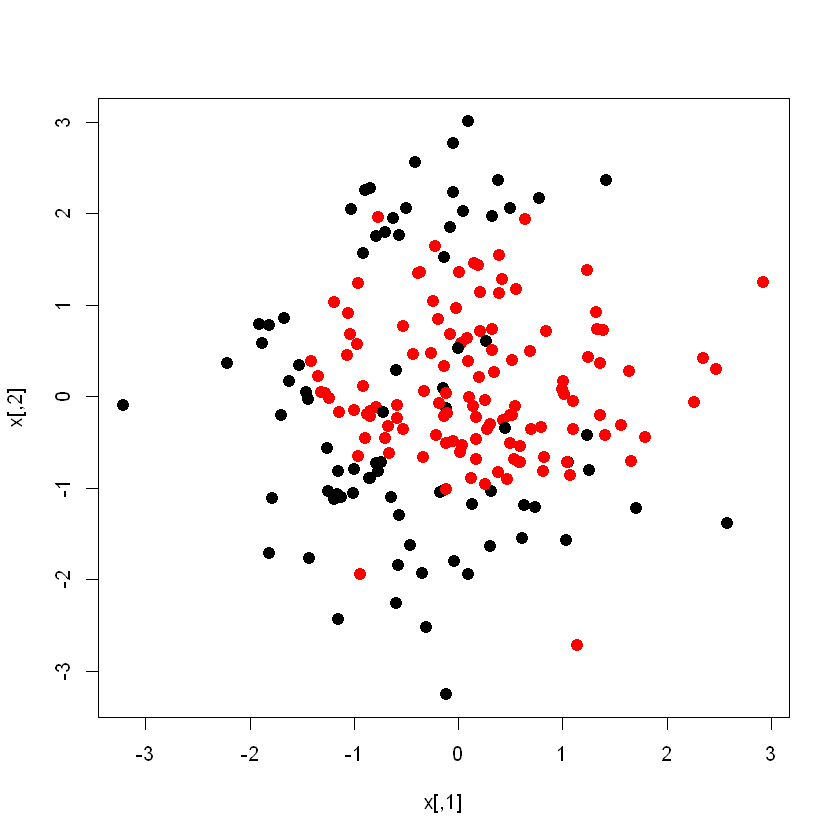

In [1]:
K <- 200
p <- 2
x <- matrix(rnorm(K*p),ncol=p)

ctr1 <- 1
ctr2 <- 0.5
r1 <- 0.2
r2 <- 0.5
v <- r1 * (x[,1]-ctr1)^2 + r2 * (x[,2]-ctr2)^2
t <- 1.2
v0 <- which(v< t)
v1 <- which(v>=t)

gr <- rep(0,K)
p0 <- 0.1
p1 <- 0.9
gr[v0] <- sample(0:1,length(v0),replace=TRUE,prob=c(p0,1-p0))
gr[v1] <- sample(0:1,length(v1),replace=TRUE,prob=c(p1,1-p1))

plot(x,col=gr+1,pch=20,cex=2)

In [2]:
x1. <- seq(from=min(x[,1]),to=max(x[,1]),length=100)
x2. <- seq(from=min(x[,2]),to=max(x[,2]),length=100)
x. <- as.data.frame(expand.grid(x1.,x2.))

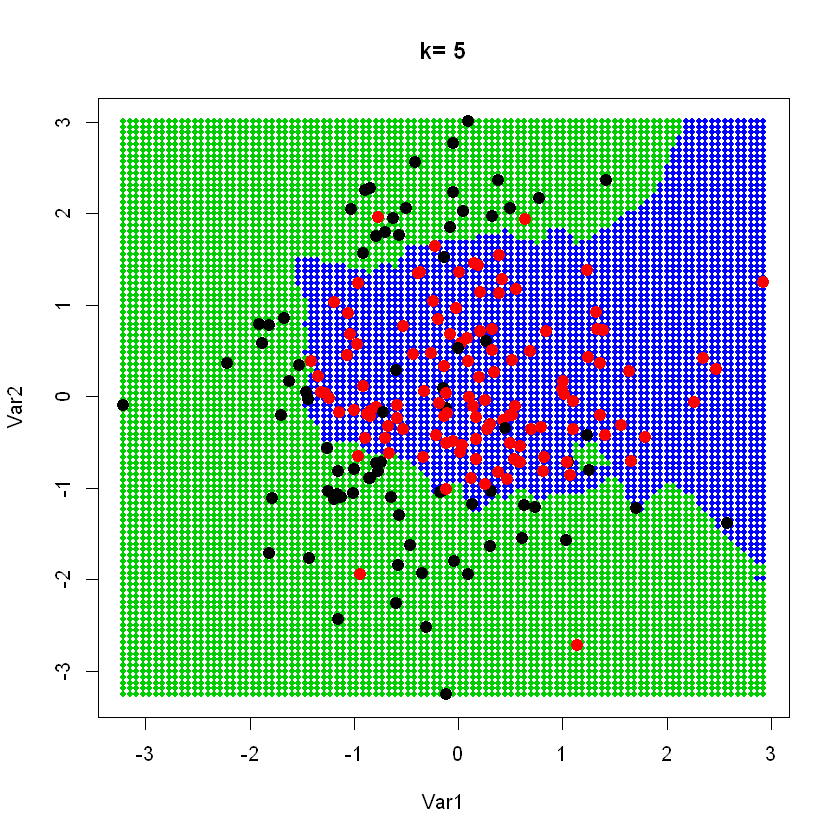

In [3]:
library(class)
k <- 5
knn.out <- knn(x,x., gr, k = k, prob=TRUE)
plot(x.,col=as.numeric(knn.out)+2,pch=20,main = paste("k=",k))
points(x,col=gr+1,pch=20,cex=2)


# Assignment 課題

+ Describe kNN-based classification method.

# The parameter of method, k, is a smoothing parameter

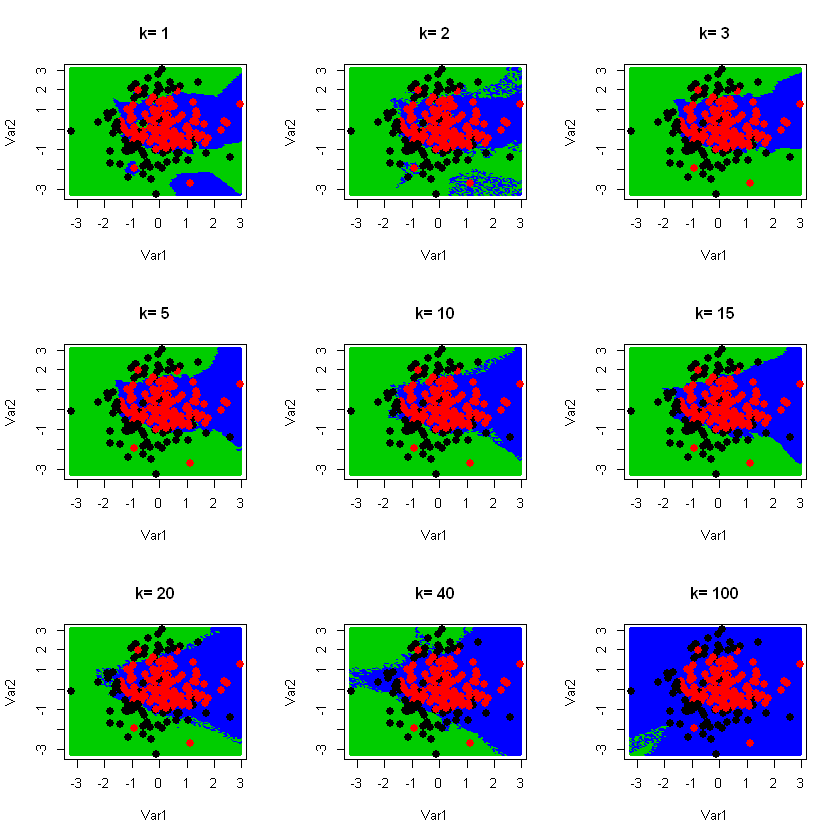

In [4]:
ks <- c(1,2,3,5,10,15,20,40,100)
par(mfrow=c(3,3))
for(i in 1:9){
    knn.out <- knn(x,x., gr, k = ks[i], prob=TRUE)
    #str(knn.out)

    plot(x.,col=as.numeric(knn.out)+2,pch=20,main = paste("k=",ks[i]))
    points(x,col=gr+1,pch=20,cex=2)
}
par(mfcol=c(1,1))

## Assignment 課題

+ Using the data set generation codes above, generate multiple (e.g., 1000) pairs of training and test sets. For each set, apply least square and kNN methods with k= {1,2,3,5,10,15,20,40,100} and calculate error rates of training and test sets. Visualize the results.